In [1]:
import keras

Using TensorFlow backend.


**Step 1: Preparing the IMDB data**

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

In [4]:
print('Loading data...')

Loading data...


In [5]:
imdb_path = "H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\imdb.npz"
(input_train, y_train), (input_test, y_test) = imdb.load_data(path = imdb_path, num_words = max_features)

In [6]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [7]:
print('Pad sequences (samples x time)')

Pad sequences (samples x time)


In [8]:
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

In [9]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


**Step 2: Using the LSTM layer in Keras**

In [11]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM

**About Embedding Layer**

   * The Embedding layer is a dictionary that maps integer indices (which stand for specific words) to dense vectors
   * It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors--> Dictionary lookup
   
**More Info...**
   * The Embedding Layer takes as input a 2D tensor of integers, of shape (samples, sequence_length)
       * where each entry is a sequence of integers
       * it can embed sequences of variable lengths
   * Example 
       * feed into the Embedding layer in the batches with shapes (32, 10)(batch of 32 sequences of length 10) or 
           * (64, 15)(batch of 64 sequences of length 15)
   * All sequences in a batch must have the same length
       * Sequences that are shorter than others should be padded with zeros, and
       * Sequences that are longer should be truncated

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


**About RMSprop**

  * It is a gradient based optimization technique used in training neural networks 
  * It balances the step size(momentum)
     * decreasing the step for large gradients to avoid exploding, and
     * increasing the step for small gradients to avoid vanishing

In [18]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [19]:
#history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.5153 - acc: 0.7557 - val_loss: 0.5318 - val_acc: 0.8112
Epoch 2/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.3037 - acc: 0.8808 - val_loss: 0.3723 - val_acc: 0.8366
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2445 - acc: 0.9082 - val_loss: 0.2905 - val_acc: 0.8784
Epoch 4/10
20000/20000 [==============================] - 90s 5ms/step - loss: 0.2042 - acc: 0.9268 - val_loss: 0.2962 - val_acc: 0.8822
Epoch 5/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1739 - acc: 0.9377 - val_loss: 0.3527 - val_acc: 0.8660
Epoch 6/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.1578 - acc: 0.9447 - val_loss: 0.2879 - val_acc: 0.8838
Epoch 7/10
20000/20000 [==============================] - 98s 5ms/step - loss: 

**Step 4: Plot the results**

In [20]:
import matplotlib.pyplot as plt

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

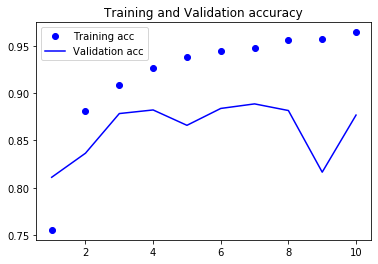

In [24]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

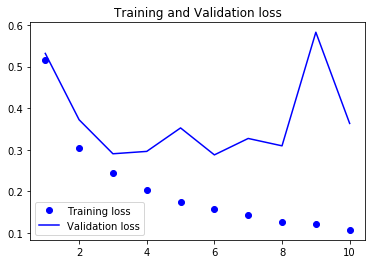

In [26]:
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()